<a href="https://colab.research.google.com/github/RECTY45/setiment-analysis-komentar-project-x-tiktok/blob/main/Analysis_Comment_Project_X_Tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install preprocessor
!pip install wordcloud
!pip install TextBlob
!pip install matplotlib
!pip install scikit-learn
!pip install pandas
!pip install Sastrawi

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/Sentiment Analys Project X Tiktok/data set.csv")
df.head()

,no,full_text
0,1,skrg sudh zamn berkembang shrusnya jngn d berh...
1,2,"bagussss setuju , next buat tempat sendiri yan..."
2,3,Anjirt gue belum pernah belanja di TikTok mala...
3,4,"kita lihat saja, kalo offline masih sepi juga,..."
4,5,Allhamdulilah yuk kita ramein lagi psr tradisi...


In [ ]:
df = df[['full_text']]
df

,full_text
0,skrg sudh zamn berkembang shrusnya jngn d berh...
1,"bagussss setuju , next buat tempat sendiri yan..."
2,Anjirt gue belum pernah belanja di TikTok mala...
3,"kita lihat saja, kalo offline masih sepi juga,..."
4,Allhamdulilah yuk kita ramein lagi psr tradisi...
...,...
336,tanah abang adalah cerminan pasar seluruh Indo...
337,"ga ngepek, yg ada lajada ma sopi mlh rame"
338,"apa yg mereka harapkan masih ada Oren,ijo,mera..."
339,"musim panas"" ngapain keluar"" kepasar mending b..."


**1. Cleaning Data**

In [ ]:
df.shape # baris dan kolom data jadi di sini ada 341 baris dan 1 kolom

(341, 1)

In [ ]:
df = df.drop_duplicates(subset='full_text') # menghapus beberapa atribut yang memiliki nilai yang duplikat

In [ ]:
df.duplicated().sum() #mengecek apakah masih ada data duplikat

0

In [ ]:
df = df.dropna() # ini berfungsi menghapus nilai yang kosong

In [ ]:
df.isnull().sum() # mengecek apakah ada variabel yang kosong

full_text    0
dtype: int64

In [ ]:
df.shape # melakukan pengecekan lagi apakah ada perubahan pada barisnya

(339, 1)

In [ ]:
import re

def clean_tiktok_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Menghapus mention yang di awali dengan @
    text = re.sub(r'#\w+', '', text) # Menghapus Semua hashtag dari teks mencocokkan pola '#' diikuti oleh karakter alfanumerik atau garis bawah (\w) dan menggantinya dengan string kosong.
    text = re.sub(r'RT[\s]+', '', text) # Menghapus marker retweet (RT) diikuti oleh satu atau lebih spasi
    text = re.sub(r'https?://\S+', '', text) # Menghapus https://
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text)  # Menambahkan ekspresi reguler untuk memisahkan kata-kata yang digabungkan

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Mengganti \s+ dengan \s untuk menghindari multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Contoh penggunaan pada DataFrame
df['full_text'] = df['full_text'].apply(clean_tiktok_text)


In [ ]:
df['full_text'] = df['full_text'].str.lower() # mengkonversi kalimatnya menjadu huruf kecil

In [ ]:
df.head() # melihat lagi datanya

,full_text
0,skrg sudh zamn berkembang shrusnya jngn d berh...
1,bagussss setuju next buat tempat sendiri yang ...
2,anjirt gue belum pernah belanja di tik tok mal...
3,kita lihat saja kalo offline masih sepi juga k...
4,allhamdulilah yuk kita ramein lagi psr tradisi...


**2.Processing Data**



*   Normalisasi
*   Tokenize
*   Stimming





In [ ]:

# Proses Normalisasi
norm = {"yg": "yang",'engga': 'tidak','ga':'tidak','kalo' : 'kalau','lu':'kamu','bekamum':'belum', 'gua' : 'saya','psr' : 'pasar','gue' : 'saya','zamn' : 'zaman','shrusnya' : 'seharusnya','anjirt' : 'anjing', 'bagussss' : 'bagus', 'skrg' : 'sekarang','tak' : 'tidak','mantap': 'keren','jngn' : 'jangan','sudh':'sudah','next': 'selanjutnya','offline':'luring','mlh':'malah','sm':'sama','ntidakpain kekamuar':'ngapain keluar','tik tok':'tiktok','LUCUU':'lucu','bljr':'belajar','shrusnya jngn d':'seharusnya jangan di'}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text
0,sekarang sudah zaman berkembang seharusnya jan...
1,bagus setuju selanjutnya buat tempat sendiri y...
2,anjing saya belum pernah belanja di tiktok mal...
3,kita lihat saja kalau luring masih sepi jutida...
4,allhamdulilah yuk kita ramein lagi pasar tradi...
...,...
336,tanah abang adalah cerminan pasar sekamuruh in...
337,tidak ngepek yang ada lajada ma sopi malah rame
338,apa yang mereka harapkan masih ada orenijomera...
339,musim panas ngapain keluar kepasar mending bel...


In [ ]:
# Proses Tokenize atau Tokenisasi
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [sekarang, sudah, zaman, berkembang, seharusny...
1      [bagus, setuju, selanjutnya, buat, tempat, sen...
2      [anjing, saya, belum, pernah, belanja, di, tik...
3      [kita, lihat, saja, kalau, luring, masih, sepi...
4      [allhamdulilah, yuk, kita, ramein, lagi, pasar...
                             ...                        
336    [tanah, abang, adalah, cerminan, pasar, sekamu...
337    [tidak, ngepek, yang, ada, lajada, ma, sopi, m...
338    [apa, yang, mereka, harapkan, masih, ada, oren...
339    [musim, panas, ngapain, keluar, kepasar, mendi...
340    [kuncinya, barang, yang, di, konsumtif, sama, ...
Name: full_text, Length: 339, dtype: object

In [ ]:
import nltk
# Download model tokenizer 'punkt'
nltk.download('punkt')
# Download daftar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_text = ' '.join(stemmer.stem(word) for word in text_cleaning) # tidak perlu processing ketika data sudah di backup/processing
    print(stemmed_text)
    return stemmed_text

# Mengasumsikan bahwa tokenized adalah DataFrame dengan kolom bernama 'full_text'
tokenized= tokenized.apply(stemming)
tokenized.to_csv("/content/sample_data/Data/Sentiment Analys Project X Tiktok/hasilPreprocessingData.csv", index=False)

data = pd.read_csv("/content/sample_data/Data/Sentiment Analys Project X Tiktok/hasilPreprocessingData.csv", encoding='latin1')


**3.Translite**

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/Sentiment Analys Project X Tiktok/hasilPreprocessingData.csv",encoding='latin1')
data.head()

,full_text
0,sekarang sudah zaman kembang harus jangan d he...
1,bagus tuju lanjut buat tempat sendiri yang isi...
2,anjing saya belum pernah belanja di tiktok mal...
3,kita lihat saja kalau luring masih sepi jutida...
4,allhamdulilah yuk kita ramein lagi pasar tradi...


In [ ]:
from translate import Translator
import numpy as np

def convert_eng(tiktok):
    if isinstance(tiktok, str):
        translator = Translator(to_lang="en", from_lang="id")
        translations = translator.translate(tiktok)
        return translations                           # gak perlu ketika sudah translite
    else:
        return np.nan

data['tiktok_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/sample_data/Data/Sentiment Analys Project X Tiktok/TerjemahanData.csv")


**4.Labeling**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/Sentiment Analys Project X Tiktok/TerjemahanData.csv",index_col=0)
data

,full_text,tiktok_english
0,sekarang sudah zaman kembang harus jangan d he...,"now that it has been developed, you must not s..."
1,bagus tuju lanjut buat tempat sendiri yang isi...,good going to continue to make your own place ...
2,anjing saya belum pernah belanja di tiktok mal...,my dog has never shopped at tiktok even in ttp...
3,kita lihat saja kalau luring masih sepi jutida...,we'll just see if offline is still quiet jutak...
4,allhamdulilah yuk kita ramein lagi pasar tradi...,allhamdulilah let's ramein again the tradition...
...,...,...
334,tanah abang adalah cermin pasar sekamuruh indo...,Tanah Abang is a mirror of the Indonesian Seka...
335,tidak ngepek yang ada lajada ma sopi malah rame,no ngepek that there is lajada ma sopi even rame
336,apa yang mereka harap masih ada orenijomerah a...,What they hope is that there is still orenijom...
337,musim panas ngapain keluar pasar mending belan...,Summer Out of Market Better Online Shopping Aa...


In [ ]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_tiktok = list(data['tiktok_english'].astype(str).tolist())
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tiktok  in enumerate(data_tiktok):
  analysis = TextBlob(tiktok)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif +=1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
   total_netral +=1
   status.append('Netral')
  else:
    total_negatif +=1
    status.append('Negatif')

  total +=1

print(f'Hasil Analisis Data Tiktok Method TextBlob :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'Total Data Tiktok : {total}')


Hasil Analisis Data Tiktok Method TextBlob :
Positif = 118
Netral = 181
Negatif = 40
Total Data Tiktok : 339


In [ ]:
data['klasifikasi'] =  status
data

,full_text,tiktok_english,klasifikasi
0,sekarang sudah zaman kembang harus jangan d he...,"now that it has been developed, you must not s...",Positif
1,bagus tuju lanjut buat tempat sendiri yang isi...,good going to continue to make your own place ...,Positif
2,anjing saya belum pernah belanja di tiktok mal...,my dog has never shopped at tiktok even in ttp...,Netral
3,kita lihat saja kalau luring masih sepi jutida...,we'll just see if offline is still quiet jutak...,Netral
4,allhamdulilah yuk kita ramein lagi pasar tradi...,allhamdulilah let's ramein again the tradition...,Netral
...,...,...,...
334,tanah abang adalah cermin pasar sekamuruh indo...,Tanah Abang is a mirror of the Indonesian Seka...,Netral
335,tidak ngepek yang ada lajada ma sopi malah rame,no ngepek that there is lajada ma sopi even rame,Netral
336,apa yang mereka harap masih ada orenijomerah a...,What they hope is that there is still orenijom...,Netral
337,musim panas ngapain keluar pasar mending belan...,Summer Out of Market Better Online Shopping Aa...,Positif


**5.Visualisasi**

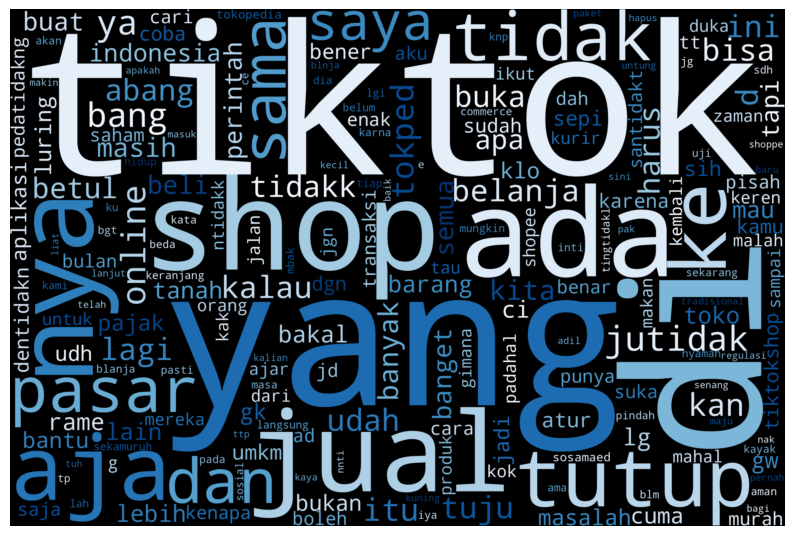

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Check if each item in 'full_text' is a string before joining
all_words = ' '.join([str(tiktok) for tiktok in data['full_text'] if isinstance(tiktok, str)])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)


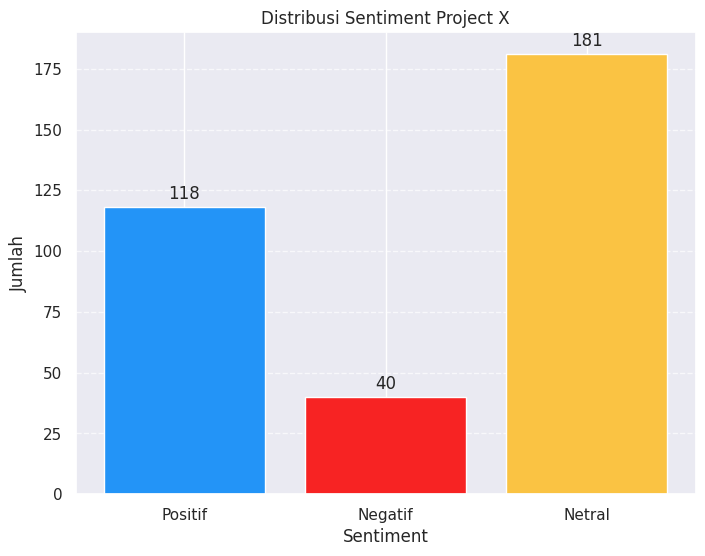

In [ ]:
import seaborn as sns
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Sudah diperbaiki: Ubah 'axix' menjadi 'axis'

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

# Pindahkan pemanggilan fungsi show_bar_chart di luar loop
show_bar_chart(labels, counts, "Distribusi Sentiment Project X")


**6.Klasifikasi Sentiment**

In [ ]:
data

,full_text,tiktok_english,klasifikasi
0,sekarang sudah zaman kembang harus jangan d he...,"now that it has been developed, you must not s...",Positif
1,bagus tuju lanjut buat tempat sendiri yang isi...,good going to continue to make your own place ...,Positif
2,anjing saya belum pernah belanja di tiktok mal...,my dog has never shopped at tiktok even in ttp...,Netral
3,kita lihat saja kalau luring masih sepi jutida...,we'll just see if offline is still quiet jutak...,Netral
4,allhamdulilah yuk kita ramein lagi pasar tradi...,allhamdulilah let's ramein again the tradition...,Netral
...,...,...,...
334,tanah abang adalah cermin pasar sekamuruh indo...,Tanah Abang is a mirror of the Indonesian Seka...,Netral
335,tidak ngepek yang ada lajada ma sopi malah rame,no ngepek that there is lajada ma sopi even rame,Netral
336,apa yang mereka harap masih ada orenijomerah a...,What they hope is that there is still orenijom...,Netral
337,musim panas ngapain keluar pasar mending belan...,Summer Out of Market Better Online Shopping Aa...,Positif


In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

status = []

for tiktok in data_tiktok:
    analysis = TextBlob(tiktok)
    if analysis.sentiment.polarity > 0.0:
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        status.append('Netral')
    else:
        status.append('Negatif')

# Tambahkan kolom label hasil analisis sentimen ke dalam dataframe
data['label'] = status

# Pisahkan data dan hapus baris dengan nilai NaN dalam kolom 'tiktok_english'
trainData, testData = train_test_split(data, test_size=0.2, random_state=42)
trainData = trainData.dropna(subset=['tiktok_english'])
testData = testData.dropna(subset=['tiktok_english'])

# Vektorisasi data menggunakan TF-IDF
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, use_idf=True)
train_vectors = vectorizer.fit_transform(trainData['tiktok_english'])
test_vectors = vectorizer.transform(testData['tiktok_english'])

# Inisialisasi model SVM
classifier_linear = svm.SVC(kernel='linear')

# Latih model SVM
classifier_linear.fit(train_vectors, trainData['label'])

# Lakukan prediksi dan evaluasi model
prediction_linear = classifier_linear.predict(test_vectors)
print(classification_report(testData['label'], prediction_linear))

# Precision: Precision mengukur seberapa banyak dari label yang diprediksi sebagai positif
# adalah benar-benar positif. Dalam konteks laporan klasifikasi yang Anda berikan, precision untuk setiap kelas (Negatif, Netral, Positif)
# Precision untuk kelas Negatif adalah 0.50, yang berarti dari semua kasus yang diprediksi sebagai Negatif, hanya 50%
# yang benar-benar Negatif. Precision untuk kelas Netral adalah 0.74, yang berarti dari semua kasus yang diprediksi sebagai Netral, 74%
# yang benar-benar Netral. Precision untuk kelas Positif adalah 0.70, yang berarti dari semua kasus yang diprediksi sebagai Positif, 70%
# yang benar-benar Positif.


              precision    recall  f1-score   support

     Negatif       0.50      0.12      0.20         8
      Netral       0.74      0.91      0.82        35
     Positif       0.70      0.64      0.67        25

    accuracy                           0.72        68
   macro avg       0.65      0.56      0.56        68
weighted avg       0.70      0.72      0.69        68



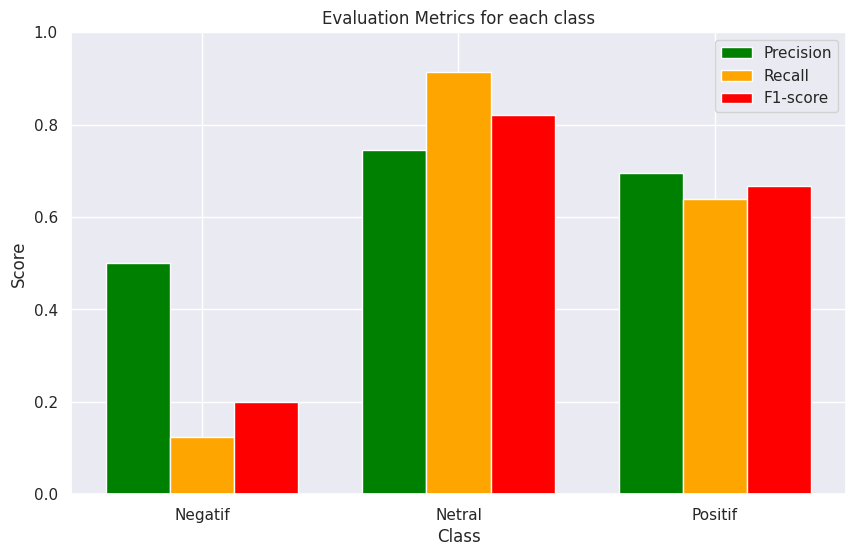

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Hasil classification report dalam bentuk teks
report = classification_report(testData['label'], prediction_linear, output_dict=True)

# Ubah hasil classification report menjadi DataFrame
report_df = pd.DataFrame(report).transpose()

# Pilih kolom precision, recall, dan f1-score untuk divisualisasikan
metrics = ['precision', 'recall', 'f1-score']
classes = report_df.index[:-3]  # Hanya ambil kelas positif, netral, dan negatif

# Plot stacked bar chart untuk setiap metrik
plt.figure(figsize=(10, 6))
barWidth = 0.25
colors = ['green', 'orange', 'red']

for i, metric in enumerate(metrics):
    values = report_df[metric][:-3]  # Hanya ambil nilai untuk kelas positif, netral, dan negatif
    r = np.arange(len(classes)) + i * barWidth
    plt.bar(r, values, color=colors[i], width=barWidth, edgecolor='white', label=metric.capitalize())

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Evaluation Metrics for each class')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.ylim(0, 1)  # Range sumbu y dari 0 hingga 1
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
